ANÁLISIS EXPLORATORIO (EDA)

In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# 2. Cargar dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data_sintetica', 'dataset_compras.csv')
df = pd.read_csv(data_path)

# Vista previa
df.head()

,ID_Cliente,edad,ingresos,visitas_web,tiempo_web,productos_vistos,promociones_usadas,compra,monto_venta
0,C0001,30,2924.90,2.013366,-0.928528,0.893800,1.804473,0,0.00
1,C0002,33,2694.27,-0.242941,0.750742,-0.554035,1.387550,1,529.30
2,C0003,27,6515.97,-2.559062,-0.148233,-0.364018,0.355956,0,0.00
3,C0004,25,5469.12,0.887033,0.093840,-0.497945,2.831638,1,2144.86
4,C0005,28,2621.12,1.529819,-2.050463,1.430774,0.211051,0,0.00


In [3]:
# 3. Información general del dataset
# Dimensiones y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          10000 non-null  object 
 1   edad                10000 non-null  int64  
 2   ingresos            10000 non-null  float64
 3   visitas_web         10000 non-null  float64
 4   tiempo_web          10000 non-null  float64
 5   productos_vistos    10000 non-null  float64
 6   promociones_usadas  10000 non-null  float64
 7   compra              10000 non-null  int64  
 8   monto_venta         10000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 703.3+ KB


In [4]:
# 4. Resumen estadístico y valores nulos
# Estadísticas descriptivas
df.describe()

# Revisión de valores nulos
df.isnull().sum()

ID_Cliente            0
edad                  0
ingresos              0
visitas_web           0
tiempo_web            0
productos_vistos      0
promociones_usadas    0
compra                0
monto_venta           0
dtype: int64

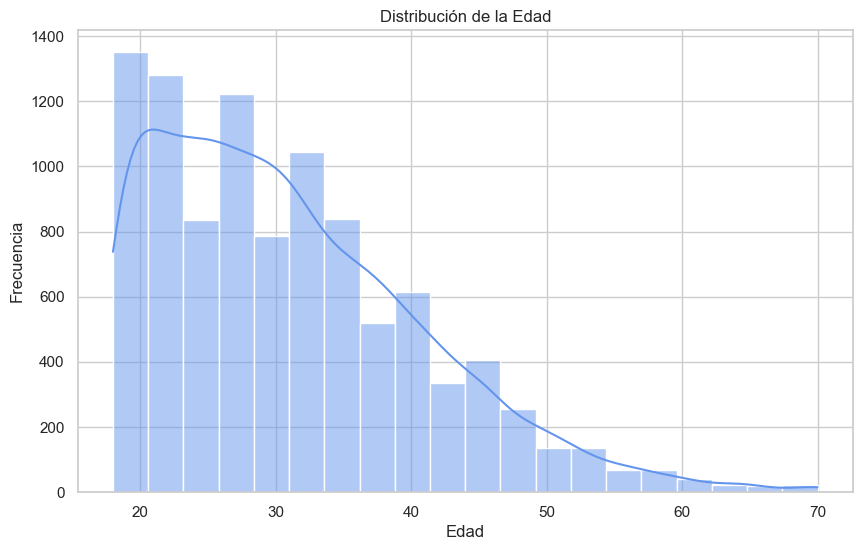

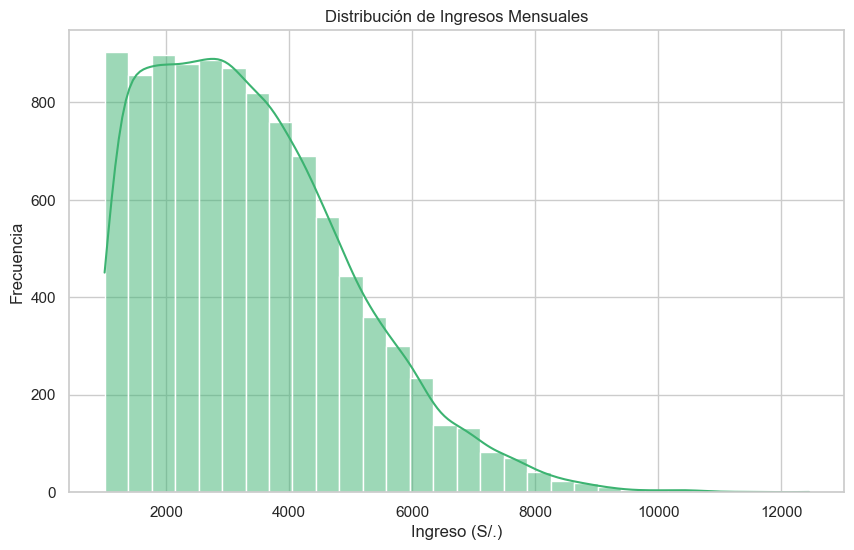

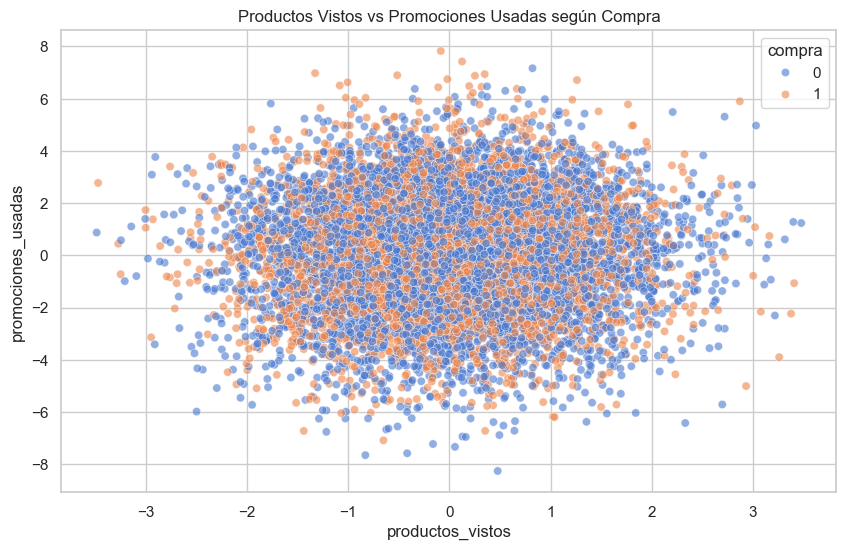

In [5]:
# 5. Distribución de variables numéricas

# Edad
sns.histplot(df['edad'], bins=20, kde=True, color='cornflowerblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Ingresos
sns.histplot(df['ingresos'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de Ingresos Mensuales")
plt.xlabel("Ingreso (S/.)")
plt.ylabel("Frecuencia")
plt.show()

# Productos vistos vs promociones usadas
sns.scatterplot(data=df, x='productos_vistos', y='promociones_usadas', hue='compra', alpha=0.6)
plt.title("Productos Vistos vs Promociones Usadas según Compra")
plt.show()

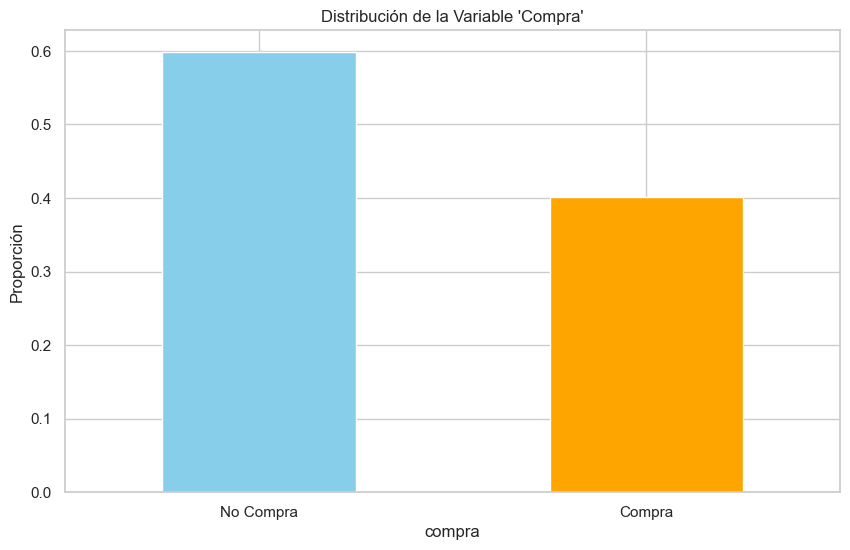

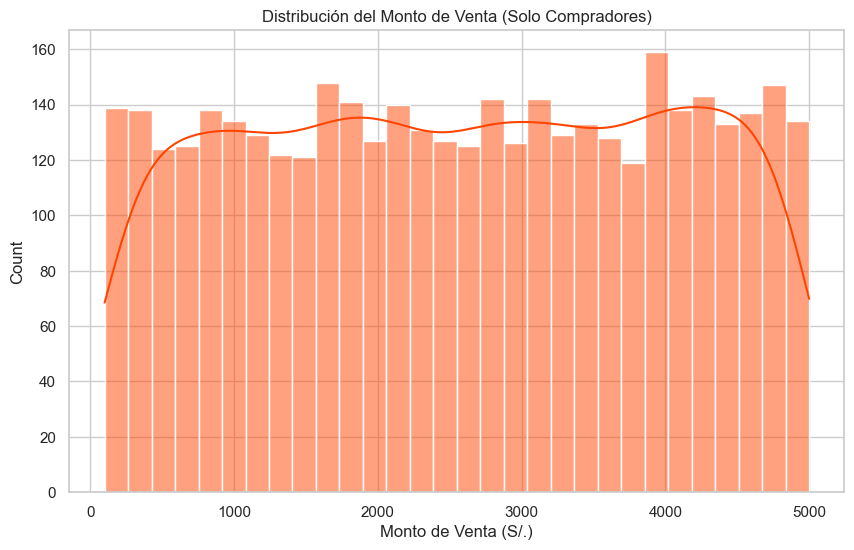

In [6]:
# 6. Análisis de comportamiento de compra

# Distribución de clase 'compra'
df['compra'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribución de la Variable 'Compra'")
plt.xticks(ticks=[0, 1], labels=['No Compra', 'Compra'], rotation=0)
plt.ylabel("Proporción")
plt.show()

# Monto de venta (solo para compradores)
sns.histplot(df[df['compra'] == 1]['monto_venta'], bins=30, kde=True, color='orangered')
plt.title("Distribución del Monto de Venta (Solo Compradores)")
plt.xlabel("Monto de Venta (S/.)")
plt.show()

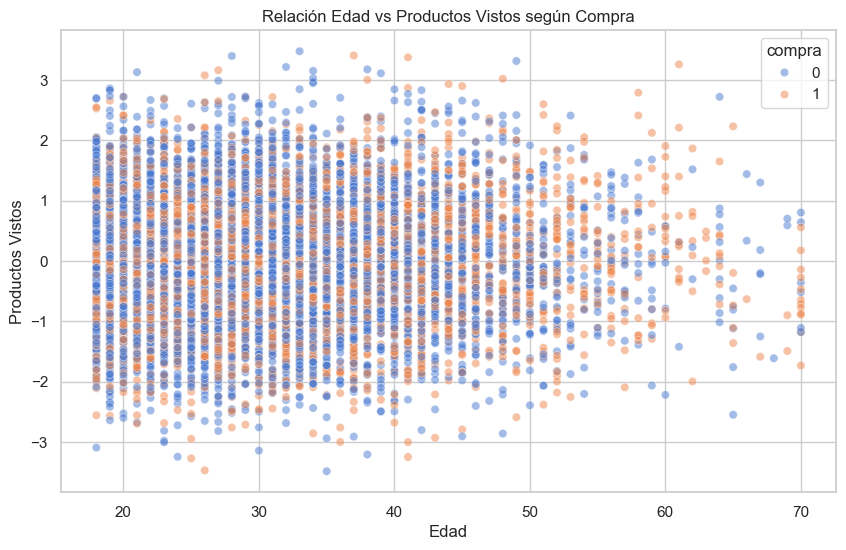

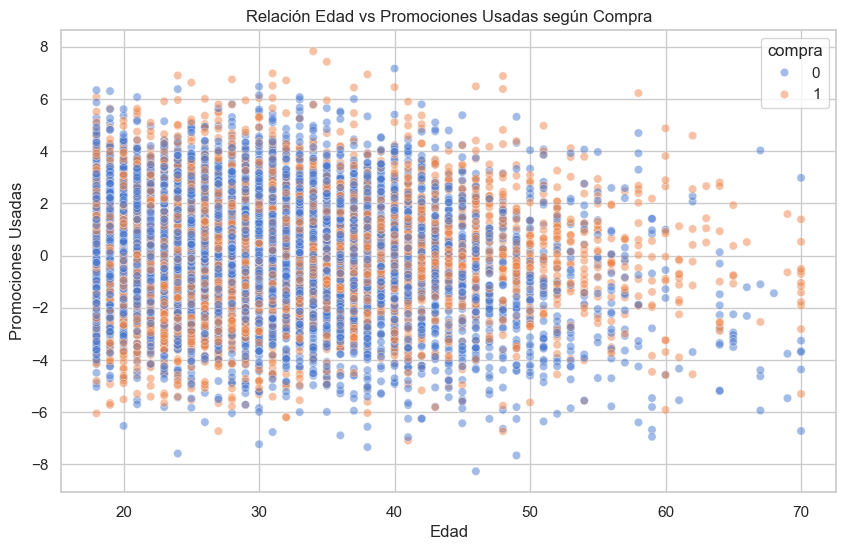

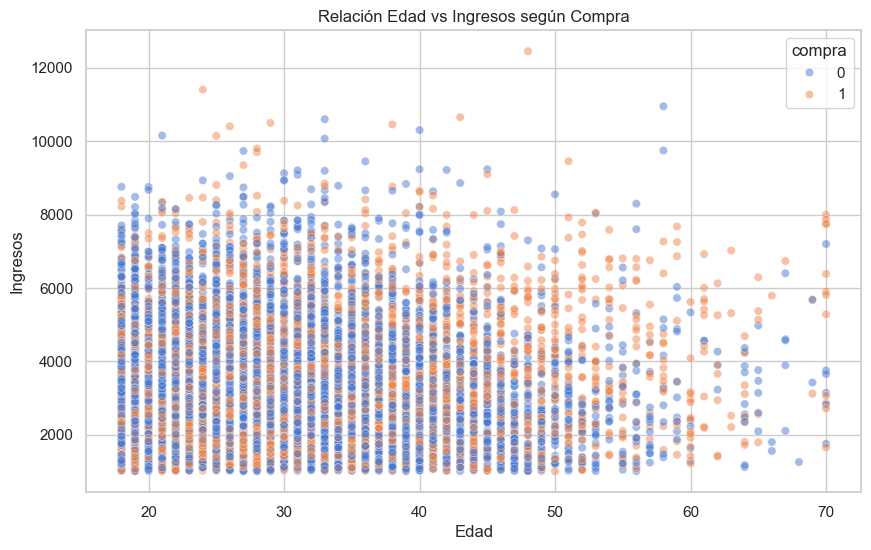

In [7]:
# 7. Relación entre variables
# Edad vs productos vistos
sns.scatterplot(data=df, x='edad', y='productos_vistos', hue='compra', alpha=0.5)
plt.title("Relación Edad vs Productos Vistos según Compra") 
plt.xlabel("Edad")
plt.ylabel("Productos Vistos")
plt.show()

# Edad vs promociones usadas
sns.scatterplot(data=df, x='edad', y='promociones_usadas', hue='compra', alpha=0.5)
plt.title("Relación Edad vs Promociones Usadas según Compra")   
plt.xlabel("Edad")
plt.ylabel("Promociones Usadas")
plt.show()

# Edad vs ingresos con color por compra
sns.scatterplot(data=df, x='edad', y='ingresos', hue='compra', alpha=0.5)
plt.title("Relación Edad vs Ingresos según Compra")
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.show()

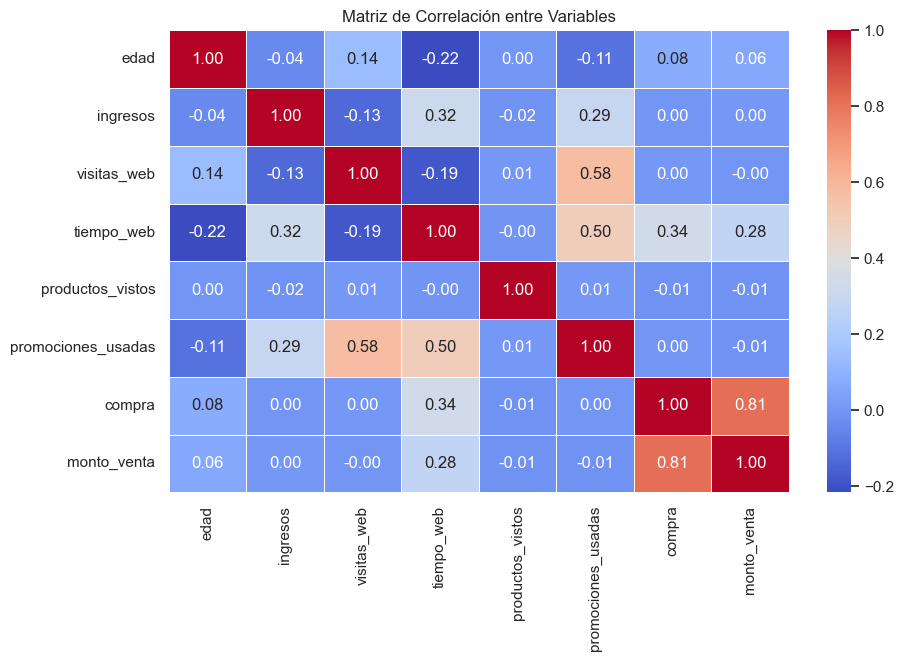

In [8]:
# 8. Matriz de correlación

# Eliminar columnas no numéricas antes de la correlación
corr = df.drop(columns=['ID_Cliente']).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# CONCLUSIONES
- No hay valores nulos en el dataset.

- La mayoría de los clientes tiene entre 25 y 60 años.

- Los ingresos suelen concentrarse entre S/. 2,000 y S/. 5,000.

- Un 40% de los clientes realizaron compras, y un 60% no.

- Los clientes que usan más promociones y ven más productos tienen mayor probabilidad de compra.

- Existe correlación moderada entre monto_venta e ingresos/productos_vistos.

- No se observan problemas de multicolinealidad.